# Análise das taxas de funding dos contratos perpétuos da Bitmex!

In [1]:
import pandas as pd
df = pd.read_json('https://www.bitmex.com/api/v1/funding?count=500&reverse=true&symbol=XBT&partial=true&columns=fundingRate')[::-1]
df.tail()

,timestamp,symbol,fundingRate
4,2020-08-07 12:00:00+00:00,XBTUSD,0.000100
3,2020-08-07 20:00:00+00:00,XBTUSD,0.000100
2,2020-08-08 04:00:00+00:00,XBTUSD,0.000100
1,2020-08-08 12:00:00+00:00,XBTUSD,-0.000031
0,2020-08-08 20:00:00+00:00,XBTUSD,0.000100


In [2]:
df.set_index('timestamp',inplace=True)
df['fundingRate'] = df['fundingRate'].mul(100)
df.tail(10)

,symbol,fundingRate
timestamp,,
2020-08-05 20:00:00+00:00,XBTUSD,0.0100
2020-08-06 04:00:00+00:00,XBTUSD,0.0100
2020-08-06 12:00:00+00:00,XBTUSD,0.0100
2020-08-06 20:00:00+00:00,XBTUSD,0.0100
2020-08-07 04:00:00+00:00,XBTUSD,0.0100
2020-08-07 12:00:00+00:00,XBTUSD,0.0100
2020-08-07 20:00:00+00:00,XBTUSD,0.0100
2020-08-08 04:00:00+00:00,XBTUSD,0.0100
2020-08-08 12:00:00+00:00,XBTUSD,-0.0031


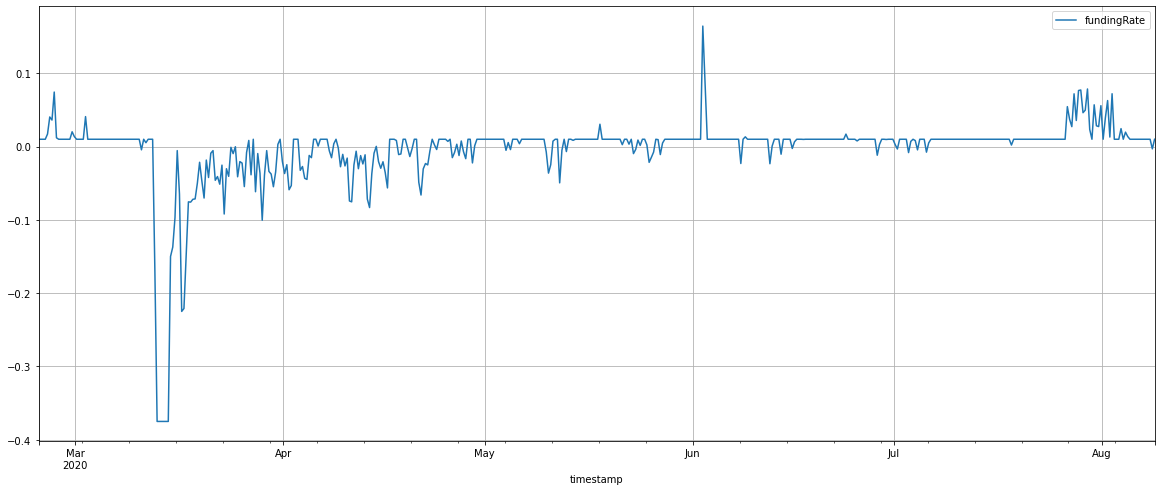

In [3]:
df.plot(figsize=(20,8), grid=True)

In [4]:
df['cumsum'] = df['fundingRate'].tail(90).cumsum()
df.tail(90)

,symbol,fundingRate,cumsum
timestamp,,,
2020-07-10 04:00:00+00:00,XBTUSD,0.0100,0.0100
2020-07-10 12:00:00+00:00,XBTUSD,0.0100,0.0200
2020-07-10 20:00:00+00:00,XBTUSD,0.0100,0.0300
2020-07-11 04:00:00+00:00,XBTUSD,0.0100,0.0400
2020-07-11 12:00:00+00:00,XBTUSD,0.0100,0.0500
...,...,...,...
2020-08-07 12:00:00+00:00,XBTUSD,0.0100,1.6238
2020-08-07 20:00:00+00:00,XBTUSD,0.0100,1.6338
2020-08-08 04:00:00+00:00,XBTUSD,0.0100,1.6438


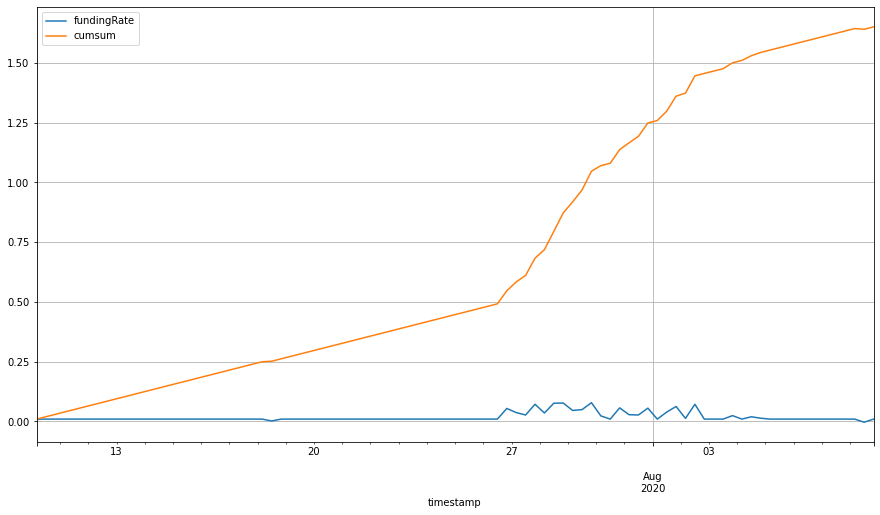

In [5]:
df.tail(90).plot(figsize=(15,8), grid=True)

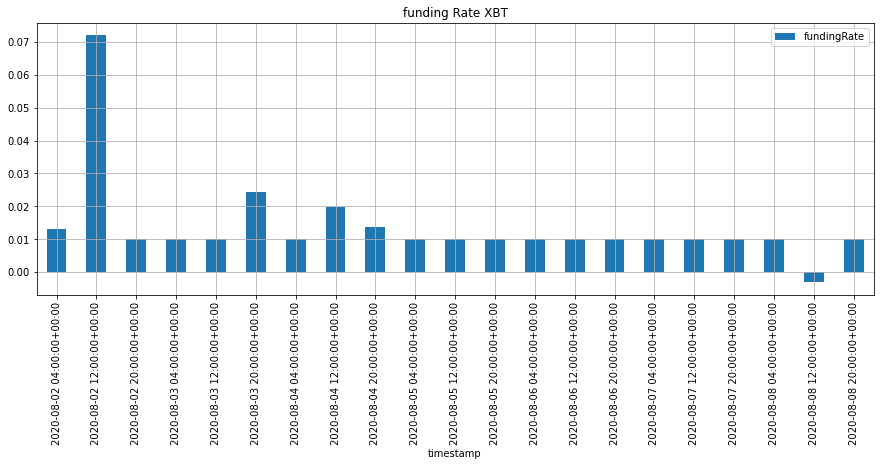

In [6]:
df['fundingRate'].tail(21).plot.bar(figsize=(15, 5), grid=True, title='funding Rate XBT', legend=True)